<ipython-input-1-d1da79b14d6f>:12: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Shape du test set: (18,)
Logistic Regression - Meilleurs hyperparamètres : {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression - Accuracy validation : 0.8464285714285713
Logistic Regression - Accuracy test set : 0.8333333333333334


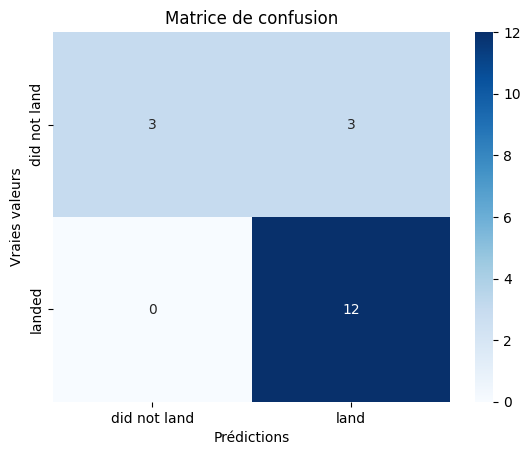

SVM - Meilleurs hyperparamètres : {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
SVM - Accuracy validation : 0.8482142857142856
SVM - Accuracy test set : 0.8333333333333334


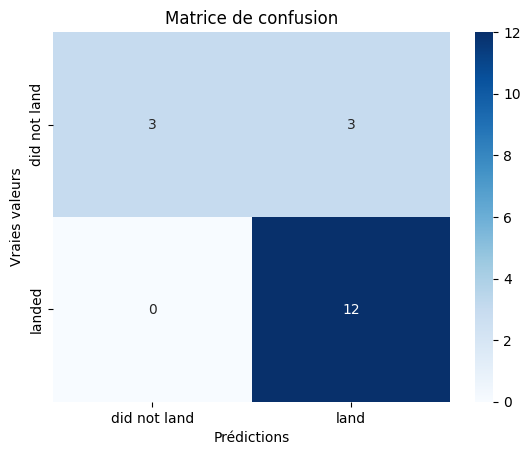

Decision Tree - Meilleurs hyperparamètres : {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
Decision Tree - Accuracy validation : 0.8857142857142858
Decision Tree - Accuracy test set : 0.8333333333333334


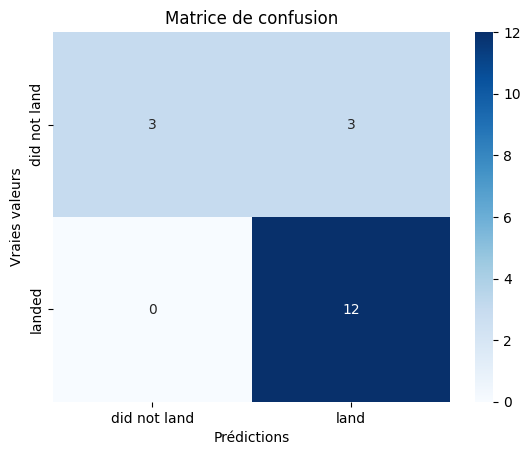

KNN - Meilleurs hyperparamètres : {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
KNN - Accuracy validation : 0.8482142857142858
KNN - Accuracy test set : 0.8333333333333334


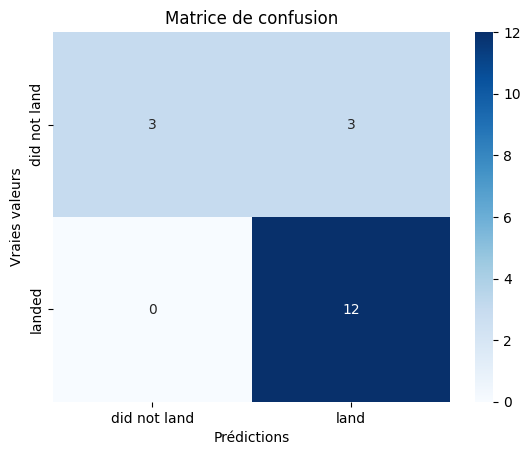

                 Model  Test Accuracy
0  Logistic Regression       0.833333
1                  SVM       0.833333
2        Decision Tree       0.833333
3                  KNN       0.833333
Le meilleur modèle est Logistic Regression avec une accuracy de 0.83
prout


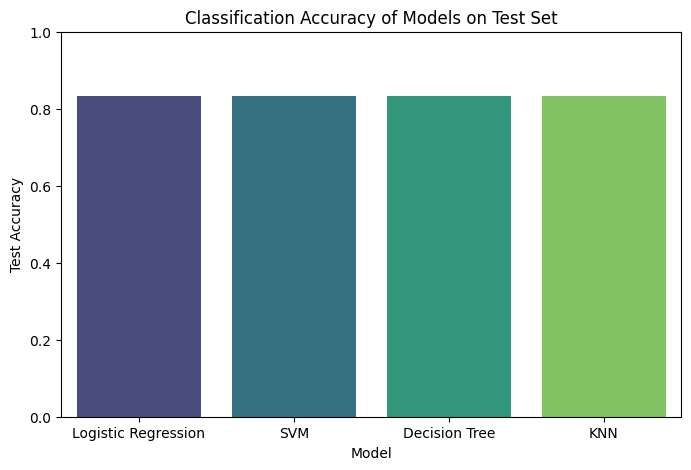

The model with the highest test accuracy is Logistic Regression with accuracy 0.83


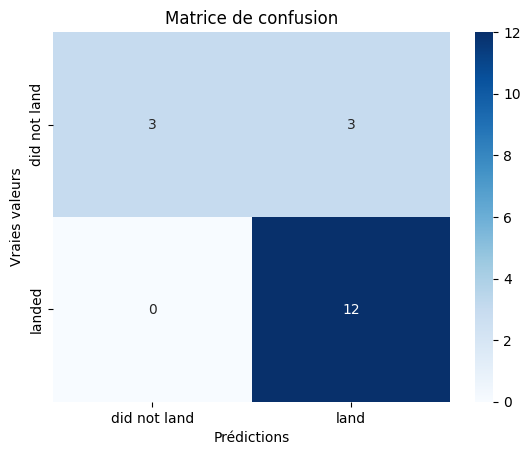

In [1]:
# =============================
# IMPORTATION DES LIBRAIRIES
# =============================

#!pip install seaborn
#!pip install pandas numpy

import piplite
await piplite.install(['numpy', 'pandas', 'seaborn', 'scikit-learn', 'matplotlib'])


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# =============================
# FONCTION POUR MATRICE DE CONFUSION
# =============================
def plot_confusion_matrix(y, y_predict):
    "Fonction pour tracer la matrice de confusion"
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='d', cmap='Blues')  # annot=True pour annoter les cellules
    ax.set_xlabel('Prédictions')
    ax.set_ylabel('Vraies valeurs')
    ax.set_title('Matrice de confusion')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

# =============================
# CHARGEMENT DES DONNÉES
# =============================
from js import fetch
import io

# Dataset principal
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

# Dataset features
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

# =============================
# TASK 1 : CRÉER LE VECTEUR Y
# =============================
Y = data['Class'].to_numpy()

# =============================
# TASK 2 : STANDARDISATION DES DONNÉES
# =============================
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

# =============================
# TASK 3 : SPLIT TRAIN/TEST
# =============================
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print("Shape du test set:", Y_test.shape)

# =============================
# TASK 4 : LOGISTIC REGRESSION AVEC GRIDSEARCH
# =============================
parameters_lr = {'C':[0.01,0.1,1],
                 'penalty':['l2'],
                 'solver':['lbfgs']}

lr = LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters_lr, cv=10)
logreg_cv.fit(X_train, Y_train)

print("Logistic Regression - Meilleurs hyperparamètres :", logreg_cv.best_params_)
print("Logistic Regression - Accuracy validation :", logreg_cv.best_score_)

# TASK 5 : Accuracy sur test set
print("Logistic Regression - Accuracy test set :", logreg_cv.score(X_test, Y_test))

# Matrice de confusion
yhat_lr = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_lr)

# =============================
# TASK 6 : SUPPORT VECTOR MACHINE
# =============================
parameters_svm = {'kernel':('linear', 'rbf','poly','sigmoid'),
                  'C': np.logspace(-3, 3, 5),
                  'gamma':np.logspace(-3, 3, 5)}

svm = SVC()
svm_cv = GridSearchCV(svm, parameters_svm, cv=10)
svm_cv.fit(X_train, Y_train)

print("SVM - Meilleurs hyperparamètres :", svm_cv.best_params_)
print("SVM - Accuracy validation :", svm_cv.best_score_)

# TASK 7 : Accuracy sur test set
print("SVM - Accuracy test set :", svm_cv.score(X_test, Y_test))
yhat_svm = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_svm)

# =============================
# TASK 8 : DECISION TREE
# =============================
parameters_tree = {'criterion': ['gini', 'entropy'],
                   'splitter': ['best', 'random'],
                   'max_depth': [2*n for n in range(1,10)],
                   'max_features': ['sqrt', 'sqrt'],
                   'min_samples_leaf': [1, 2, 4],
                   'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters_tree, cv=10)
tree_cv.fit(X_train, Y_train)

print("Decision Tree - Meilleurs hyperparamètres :", tree_cv.best_params_)
print("Decision Tree - Accuracy validation :", tree_cv.best_score_)

# TASK 9 : Accuracy sur test set
print("Decision Tree - Accuracy test set :", tree_cv.score(X_test, Y_test))
yhat_tree = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_tree)

# =============================
# TASK 10 : K NEAREST NEIGHBORS
# =============================
parameters_knn = {'n_neighbors': list(range(1,11)),
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'p': [1,2]}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, parameters_knn, cv=10)
knn_cv.fit(X_train, Y_train)

print("KNN - Meilleurs hyperparamètres :", knn_cv.best_params_)
print("KNN - Accuracy validation :", knn_cv.best_score_)

# TASK 11 : Accuracy sur test set
print("KNN - Accuracy test set :", knn_cv.score(X_test, Y_test))
yhat_knn = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_knn)

# =============================
# TASK 12 : COMPARAISON DES MÉTHODES
# =============================
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN'],
    'Test Accuracy': [logreg_cv.score(X_test, Y_test),
                      svm_cv.score(X_test, Y_test),
                      tree_cv.score(X_test, Y_test),
                      knn_cv.score(X_test, Y_test)]
})

print(results)
best_model = results.loc[results['Test Accuracy'].idxmax()]
print(f"Le meilleur modèle est {best_model['Model']} avec une accuracy de {best_model['Test Accuracy']:.2f}")

##########


print ("prout")
# Create a DataFrame with test accuracies
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN'],
    'Test Accuracy': [
        logreg_cv.score(X_test, Y_test),
        svm_cv.score(X_test, Y_test),
        tree_cv.score(X_test, Y_test),
        knn_cv.score(X_test, Y_test)
    ]
})


plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Test Accuracy', data=results, palette='viridis', hue='Model', dodge=False, legend=False)
plt.ylim(0,1)
plt.title('Classification Accuracy of Models on Test Set')
plt.ylabel('Test Accuracy')
plt.xlabel('Model')
plt.show()

# Find the best model
best_model = results.loc[results['Test Accuracy'].idxmax()]
print(f"The model with the highest test accuracy is {best_model['Model']} with accuracy {best_model['Test Accuracy']:.2f}")


# Predict with the best model (Decision Tree)
yhat_tree = tree_cv.predict(X_test)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, yhat_tree)
